## Logistic Regression ML

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Load the Data and Perform EDA

In [4]:
df = pd.read_csv("Titanic_train.csv") # csv file

In [5]:
import pandas as pd

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isna().sum() ## Check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].mean()

29.69911764705882

In [9]:
# Replace missing values in the 'Age' column with the mean of 'Age'
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.dropna(subset=['Embarked'], inplace=True)

In [12]:
# Check the data types
print("\nData Types:")
display(df.dtypes)


Data Types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
df.head() # first few rows and columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


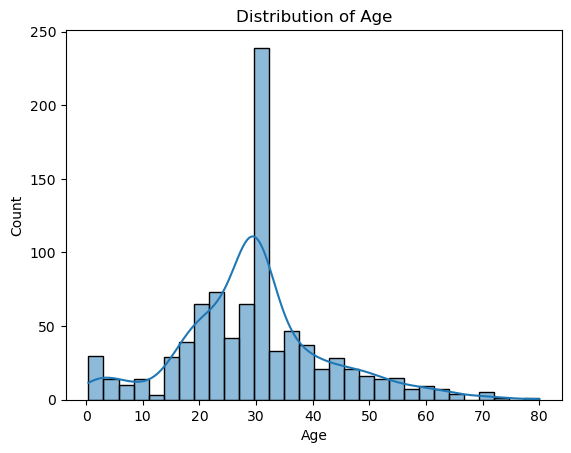

In [15]:
# Visualize distributions of numerical features
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

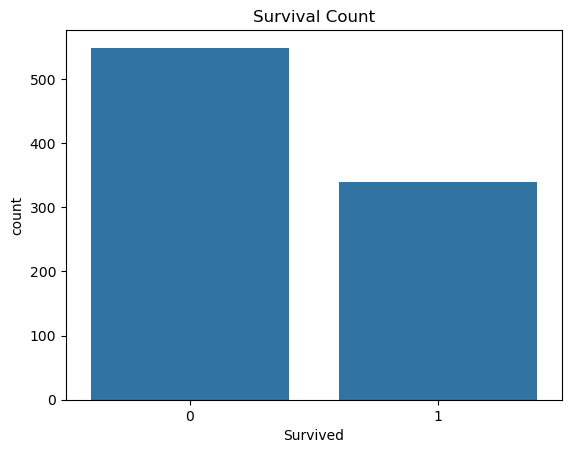

In [16]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

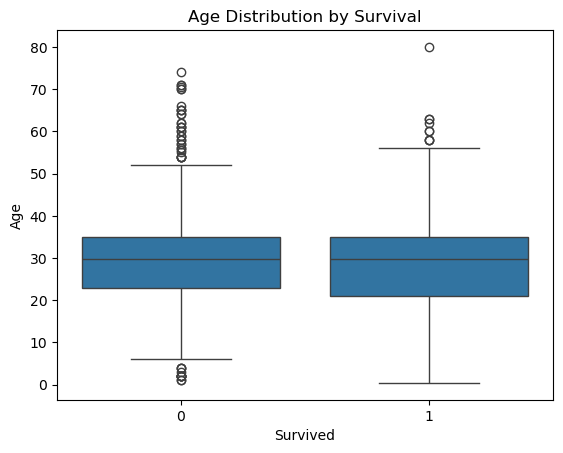

In [17]:
# Visualize relationships (e.g., Age vs. Survival)
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.show()

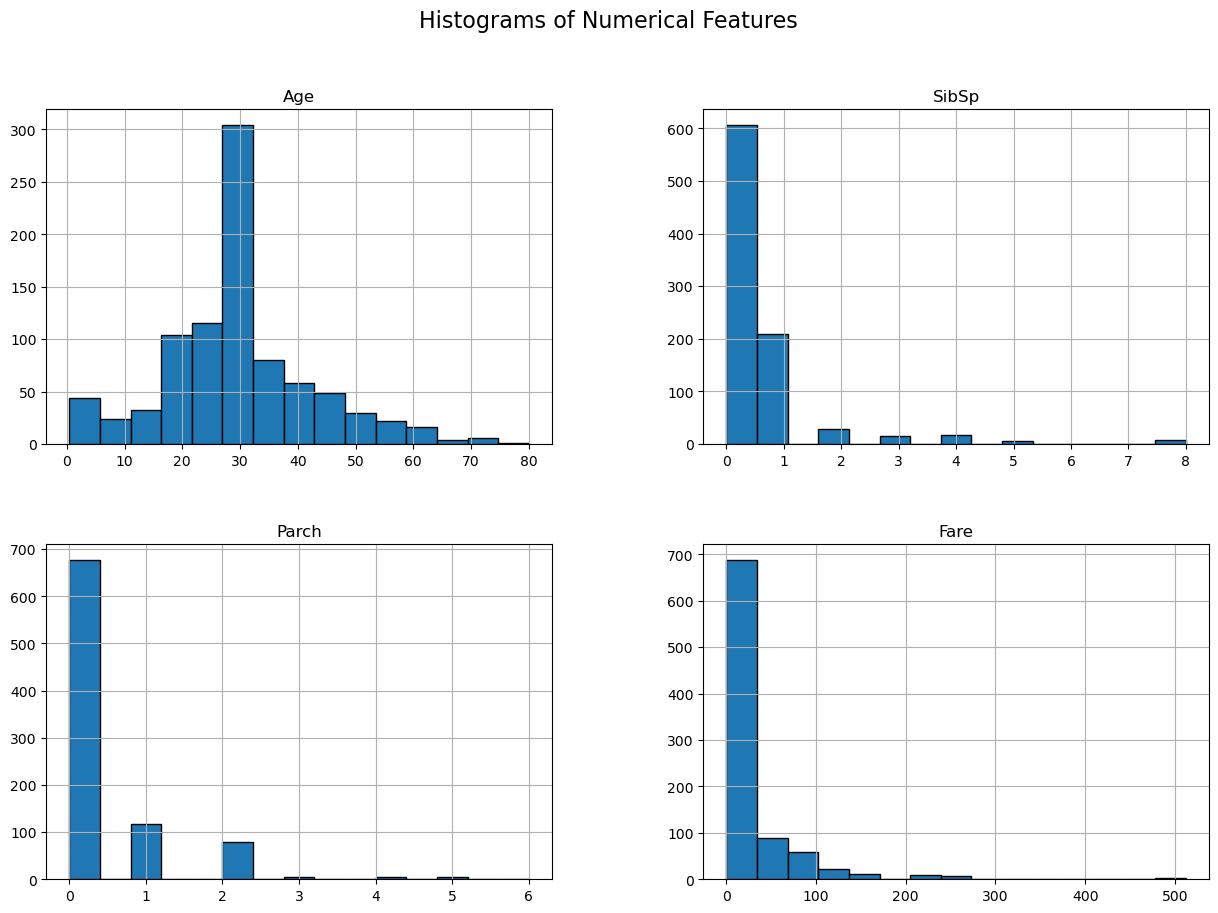

In [18]:
# Histograms 
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
df[numerical_features].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

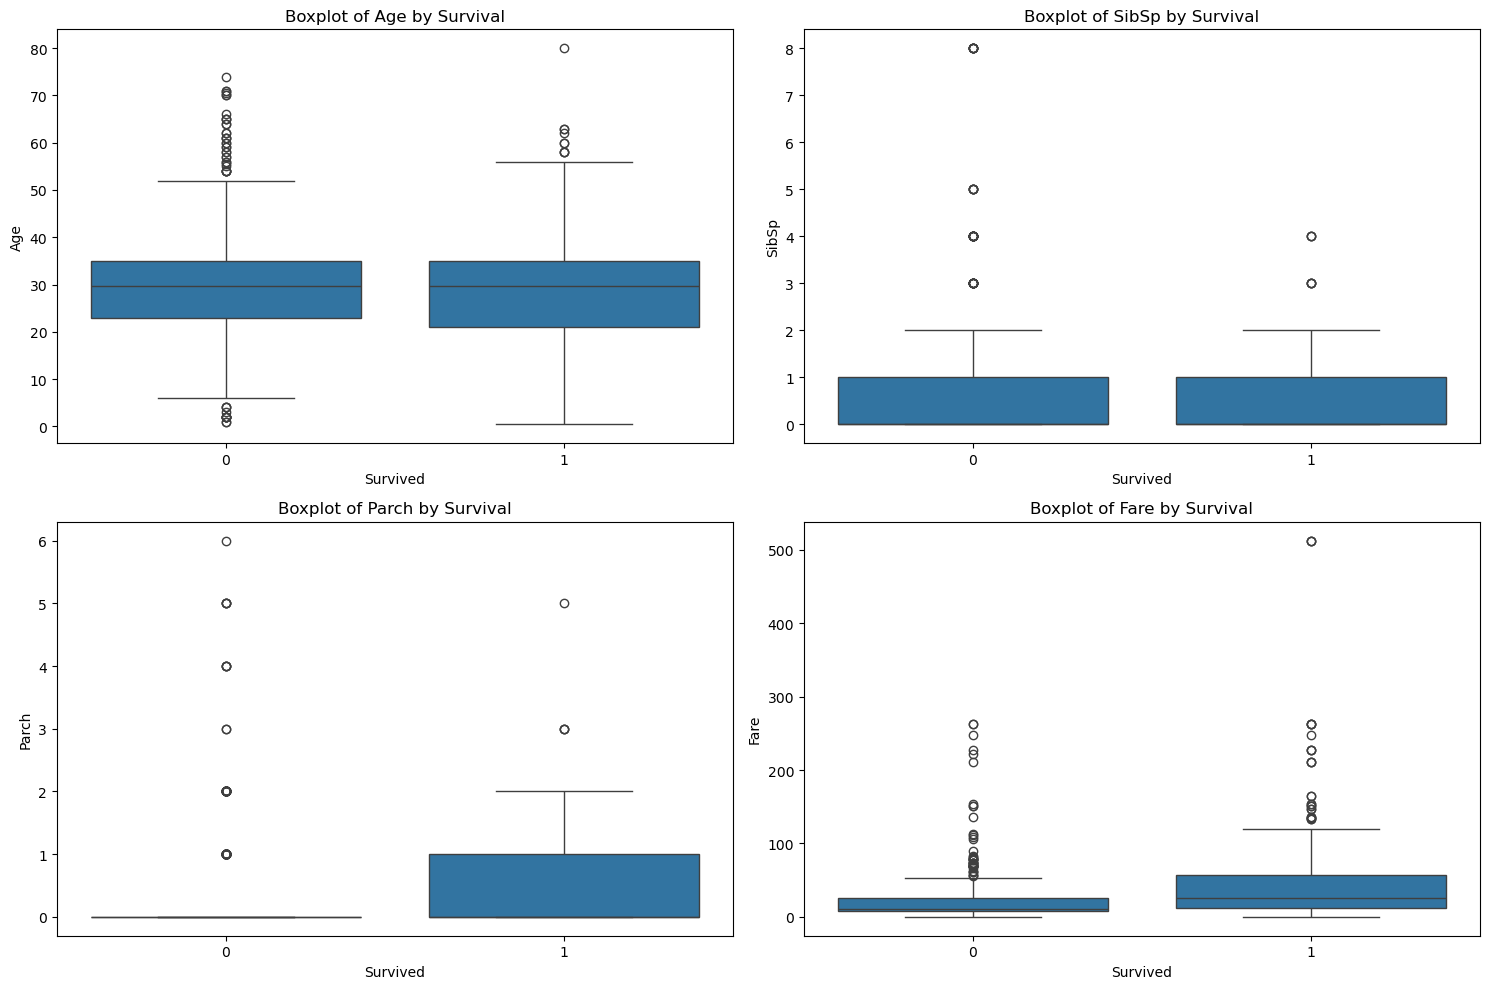

In [19]:
plt.figure(figsize=(15, 10))

# Iterate through numerical features to create boxplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Survived', y=feature, data=df)  # Use the correct 'data' argument
    plt.title(f'Boxplot of {feature} by Survival')

plt.tight_layout()
plt.show()


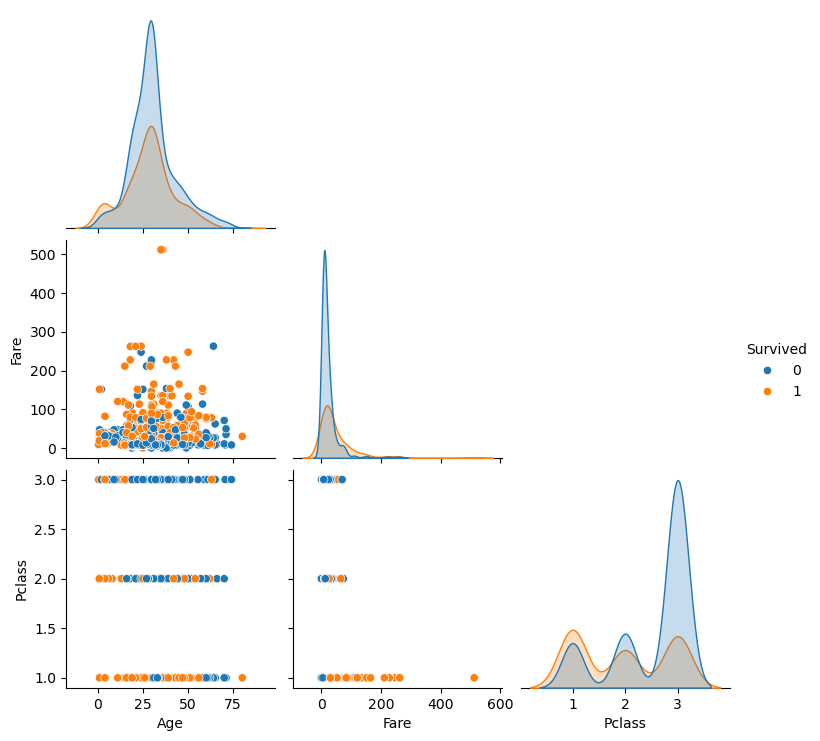

In [20]:
# Pair plot for feature relationships
selected_features = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(df[selected_features], hue='Survived', diag_kind='kde', corner=True)
plt.show()

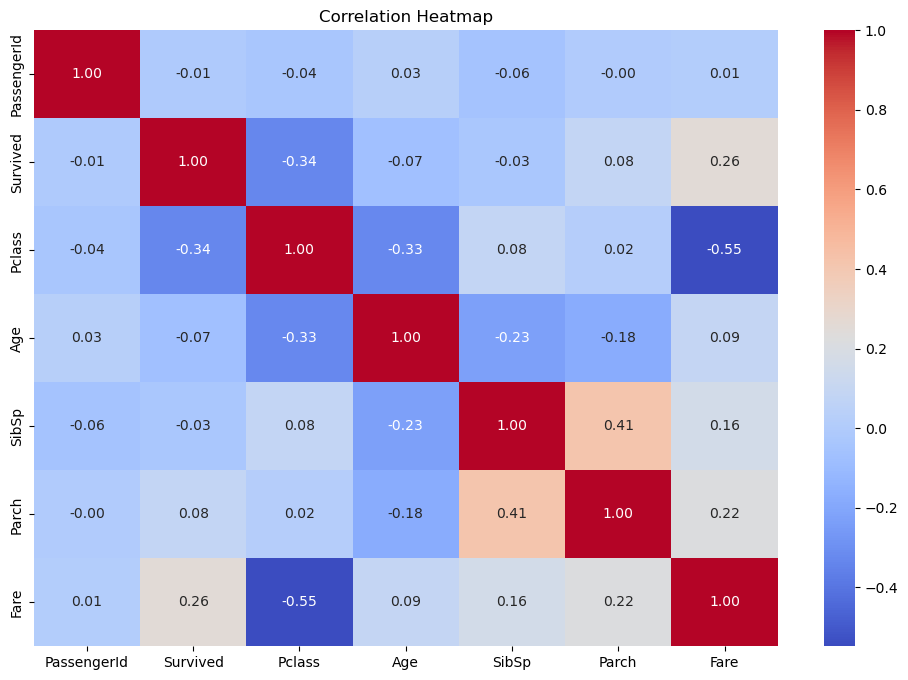

In [21]:
# Correlation heatmap
# Select only numerical features for correlation calculation
numerical_data =df.select_dtypes(include=['number'])  # Select only numerical columns

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 2 Step 2: Data Preprocessing

In [23]:
df = pd.get_dummies(data=df, columns=['Sex'], drop_first=True)

In [24]:
df = pd.get_dummies(data=df, columns=['Embarked'])

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


## Step 3: Logistic Regression : Model¶

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Remove any extra spaces in column names (if needed)
df.columns = df.columns.str.strip()

In [31]:
# Verify the column names again
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [32]:
X = df[['Pclass','Sex_male', 'Age','SibSp','Parch', 'Fare', 'Embarked_C' , 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

In [33]:
# Check the top rows of X and y to verify
print(X.head())
print(y.head())


   Pclass  Sex_male   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0       3      True  22.0      1      0   7.2500       False       False   
1       1     False  38.0      1      0  71.2833        True       False   
2       3     False  26.0      0      0   7.9250       False       False   
3       1     False  35.0      1      0  53.1000       False       False   
4       3      True  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [34]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
model.fit(X_train, y_train) # Model Train

C:\Users\bcani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = model.predict(X_test)

In [38]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(classification_report(y_test, predictions)) # Print classification report

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       167
           1       0.71      0.72      0.72       100

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [41]:
print(confusion_matrix(y_test, predictions)) 

[[138  29]
 [ 28  72]]


In [42]:
person = {
    'Pclass': 3,
    'Sex_male': 1,
    'Age': 60,
    'SibSp': 2,
    'Parch': 4,
    'Fare': 200,
    'Embarked_C':0,
    'Embarked_Q':1,
    'Embarked_S':0
}

person_df = pd.DataFrame([person])
person_df

,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,60,2,4,200,0,1,0


In [43]:
model.predict(person_df)

array([0], dtype=int64)

## Step 4: Model Evaluation

In [45]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [46]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [48]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.79
Precision: 0.71
Recall: 0.72
F1-Score: 0.72
ROC-AUC Score: 0.85


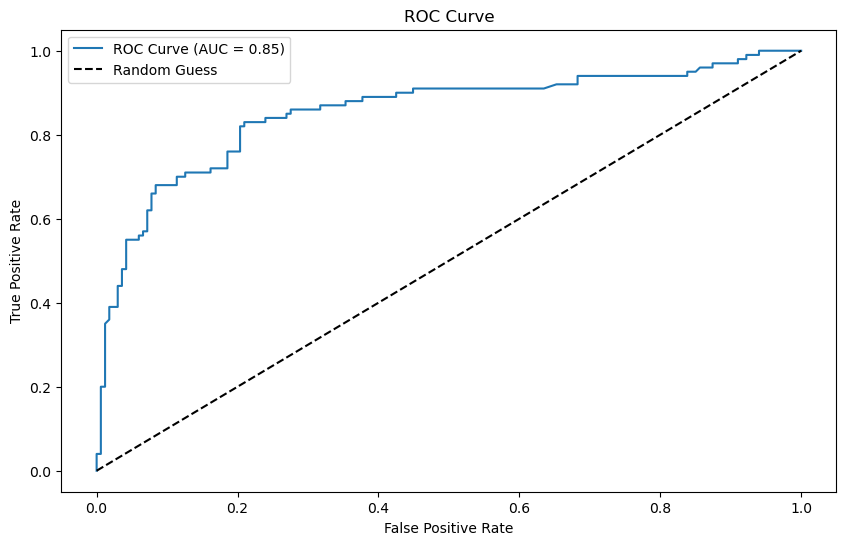

In [49]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [50]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       167
           1       0.71      0.72      0.72       100

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



## Step 5: Interpret Model Coefficients

In [52]:
# Extract feature coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

In [53]:
# Add odds ratios for easier interpretation
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
coefficients['Impact'] = coefficients['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

In [54]:
# feature coefficients and odds ratios
print("\nFeature Coefficients and Odds Ratios:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Feature Coefficients and Odds Ratios:
      Feature  Coefficient  Odds Ratio    Impact
6  Embarked_C     1.406429    4.081354  Positive
7  Embarked_Q     0.947169    2.578400  Positive
8  Embarked_S     0.779226    2.179784  Positive
5        Fare     0.002565    1.002569  Positive
2         Age    -0.040987    0.959841  Negative
4       Parch    -0.060886    0.940930  Negative
3       SibSp    -0.360977    0.696995  Negative
0      Pclass    -0.985257    0.373343  Negative
1    Sex_male    -2.680420    0.068534  Negative


In [55]:
# Discussing significance of features
print("\nFeature Significance Discussion:")
print("1. Positive coefficients indicate an increase in survival probability.")
print("2. Features with larger absolute coefficients have a stronger influence on survival.")
print("3. Odds ratios > 1 mean a higher likelihood of survival; < 1 means lower likelihood.")


Feature Significance Discussion:
1. Positive coefficients indicate an increase in survival probability.
2. Features with larger absolute coefficients have a stronger influence on survival.
3. Odds ratios > 1 mean a higher likelihood of survival; < 1 means lower likelihood.


In [56]:
# Example: Discussing specific features
for _, row in coefficients.iterrows():
    print(f"Feature: {row['Feature']} | Coefficient: {row['Coefficient']:.2f} | Odds Ratio: {row['Odds Ratio']:.2f} | Impact: {row['Impact']}")

Feature: Pclass | Coefficient: -0.99 | Odds Ratio: 0.37 | Impact: Negative
Feature: Sex_male | Coefficient: -2.68 | Odds Ratio: 0.07 | Impact: Negative
Feature: Age | Coefficient: -0.04 | Odds Ratio: 0.96 | Impact: Negative
Feature: SibSp | Coefficient: -0.36 | Odds Ratio: 0.70 | Impact: Negative
Feature: Parch | Coefficient: -0.06 | Odds Ratio: 0.94 | Impact: Negative
Feature: Fare | Coefficient: 0.00 | Odds Ratio: 1.00 | Impact: Positive
Feature: Embarked_C | Coefficient: 1.41 | Odds Ratio: 4.08 | Impact: Positive
Feature: Embarked_Q | Coefficient: 0.95 | Odds Ratio: 2.58 | Impact: Positive
Feature: Embarked_S | Coefficient: 0.78 | Odds Ratio: 2.18 | Impact: Positive


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Load your dataset
df = pd.read_csv('Titanic_train.csv')

# Preprocess the dataset (this is just a simple example, adjust based on your notebook)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encoding Sex as numeric
df = df.fillna(0)  # Handle missing values (you may need to adjust preprocessing)

X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]  # Select features
y = df['Survived']  # Target variable

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Save the model to a file using pickle
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)


Accuracy: 0.78


In [112]:
import os
print(f"Current working directory: {os.getcwd()}")


Current working directory: C:\Users\bcani


In [114]:
import os
print(os.listdir(os.getcwd()))


['.anaconda', '.astropy', '.conda', '.condarc', '.continuum', '.idea', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.spyder-py3', '.streamlit', '.vscode', 'anaconda3', 'Anthony.txt', 'AppData', 'Application Data', 'appy.py', 'conda', 'Contacts', 'Cookies', 'cover letter  DA.txt', 'Cyril.txt', 'Dep.py', 'Documents', 'Downloads', 'Favorites', 'Jedi', 'Links', 'Local Settings', 'LR .ipynb', 'L_Regression.ipynb', 'main.py', 'Marks_predictor', 'Mary.txt', 'Mary_vac.txt', 'Microsoft', 'Music', 'My Documents', 'NetHood', 'New folder', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'practice 1.ipynb', 'PrintHood', 'Project deployment', 'Python DS', 'Recent', 'Rose.txt', 'Saved Games', 'Sea

In [116]:
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
with open('titanic_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Streamlit app title
st.title("Titanic Survival Prediction")

# Input features for prediction
pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3])
age = st.number_input("Age", min_value=0, max_value=100, step=1)
sibsp = st.number_input("Number of Siblings/Spouses Aboard (SibSp)", min_value=0, max_value=10, step=1)
parch = st.number_input("Number of Parents/Children Aboard (Parch)", min_value=0, max_value=10, step=1)
fare = st.number_input("Ticket Fare", min_value=0.0, max_value=1000.0, step=0.1)
sex = st.selectbox("Sex", ["male", "female"])

# Preprocess the input
sex_encoded = 0 if sex == "male" else 1
features = [[pclass, age, sibsp, parch, fare, sex_encoded]]

# Make a prediction
if st.button("Predict"):
    prediction = model.predict(features)
    result = "Survived" if prediction[0] == 1 else "Did Not Survive"
    st.write(f"The prediction is: {result}")



2024-12-12 16:14:22.178 
  command:

    streamlit run C:\Users\bcani\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
